In [1]:
include("package.jl")
include("kagome_setup.jl")
include("KH_hamiltonian.jl")
include("ED_Thermal.jl")

entropy (generic function with 1 method)

In [7]:
include("Full_Orthogonalization_Lanczos.jl")

BLM_old (generic function with 3 methods)

In [8]:
include("Kagome-FTLM.jl")

FTLM_EandC (generic function with 2 methods)

In [75]:
"""Test GS energy of K-H model"""
step = 20; ne = 10
M = 90;
Theta = [x for x in LinRange(-1,1,step)]
la = Lattice(2,2)
dim = dimension(la)
Gs_ed = zeros(step, ne)
Gs_lm = zeros(step, ne)
Gs_lm1 = zeros(step, ne)
#E_ed = zeros(step, dim)
#E_lm = zeros(step, dim)
I = zeros(M,M)
for i = 1:M
    I[i,i] = 1.
end

for i = 1:step
    θ= Theta[i]
    J = cospi(θ) * ones(3)
    K = sinpi(θ) * ones(3)
    Hk = Kitaev(K, la)
    Hh = Heisenberg(J, la)
    Htot = Hk + Hh
    e,x = eigs(Htot, nev = ne, which = :SR)
    Gs_ed[i, :] = e
    #E_ed[i, :] = eigvals(Array(Htot))  
    T, Q = BLM(Htot, M)
    T1, Q1 = BLM_old(Htot, M)
    elm = sort(eigvals(T))
    elm1 = sort(eigvals(T1))
    Gs_lm[i,:] = elm[1:ne]
    Gs_lm1[i,:] = elm1[1:ne]
    #E_lm[i,:] = eigvals(T)
end
println("Finish!")

Finish!


In [76]:
G = Gs_lm - Gs_ed
println(Gs_ed[1,:])
println(Gs_lm[1,:])
println(Gs_lm1[1,:])

[-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0]
[-6.0, -5.99739, -5.99682, -5.99571, -5.99349, -5.9909, -5.98353, -5.9732, -5.89279, -4.94982]
[-6.0, -5.99504, -5.98995, -5.98163, -5.97871, -5.91744, -5.89359, -5.76221, -5.43775, -4.99998]


In [4]:
"""Test code"""
θ = 0.2
J = cospi(θ) * ones(3)
K = sinpi(θ) * ones(3)

la = Lattice(2,2)
N = sitenum(la)
dim = dimension(la)

Hk = Kitaev(K, la)
Hh = Heisenberg(J, la)
Htot = Hk + Hh;

println("Finish set Hamiltonian")

Finish set Hamiltonian


In [5]:
# Full ED
Hdense  = Array(Htot)
e,x = eigen(Hdense)
println("Finish diagonalize K-H model!")

Finish diagonalize K-H model!


In [9]:
V, fac = FTLM(Htot, 90, 50);
println("Finish FTLM!")

Finish FTLM!


In [16]:
""" ED Thermaldynamic quanties"""
step = 100
temp = [10^x for x in LinRange(-4,2,step)]
Z = zeros(step)
E = zeros(step)
C = zeros(step)
S = zeros(step)

#println(Z)
for i = 1: step
    t = temp[i]
    Z[i] += partitian(t, e)
    E[i] += energy(t,e)
    C[i] += specific_heat(t,e)
    S[i] += E[i]/t +log(Z[i])
    #S[i] += log(Z[i])
end

println("ed: Finish calculate Thermaldynamic quanties!")

ed: Finish calculate Thermaldynamic quanties!


In [11]:
""" Thermaldynamic quanties"""
step = 100
temp = [10^x for x in LinRange(-4,2,step)]
Zt = zeros(step)
Et = zeros(step)
Ct = zeros(step)
St = zeros(step)

for i = 1: step
    t = temp[i]
    Zt[i] = FTLM_partition(V, fac, t)
    Et[i], Ct[i] = FTLM_EandC(V, fac, t)
    St[i] = Et[i]/t + log(Zt[i])
end

println("ftlm: Finish calculate Thermaldynamic quanties!")

ftlm: Finish calculate Thermaldynamic quanties!


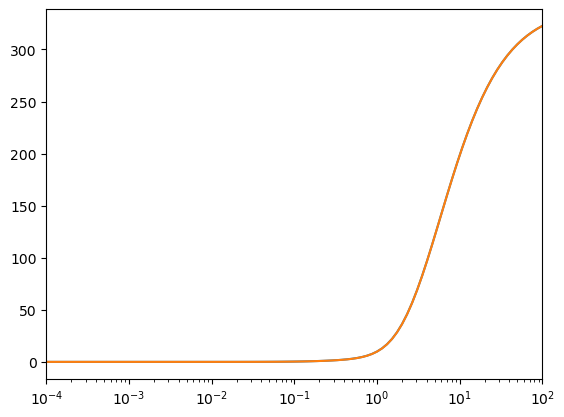

(0.00010000000000000005, 100)

In [12]:
#println(length(C))
#println(C)
semilogx(temp, Z/N)
semilogx(temp, Zt/N)
xlim(10^-4, 10^2)

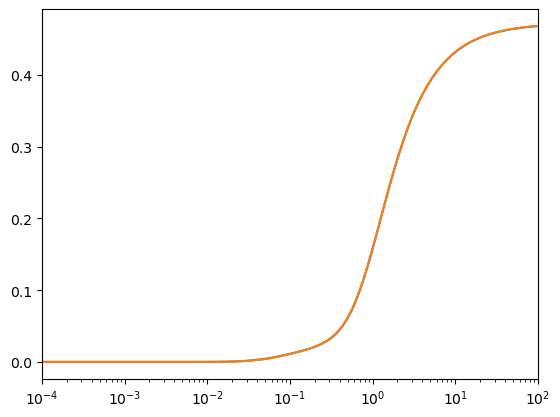

(0.00010000000000000005, 100)

In [13]:
semilogx(temp, E/N)
semilogx(temp, Et/N)
xlim(10^-4, 10^2)

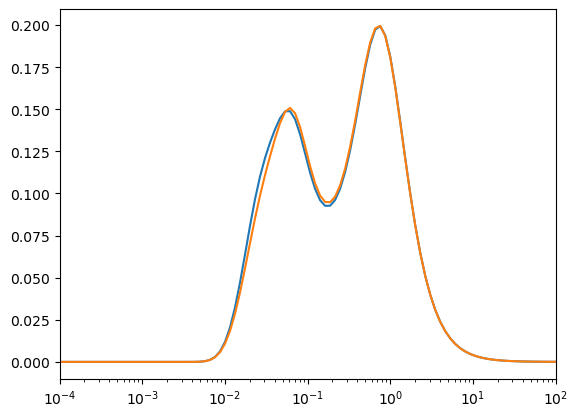

(0.00010000000000000005, 100)

In [14]:
semilogx(temp, C/N)
semilogx(temp, Ct/N)
xlim(10^-4, 10^2)

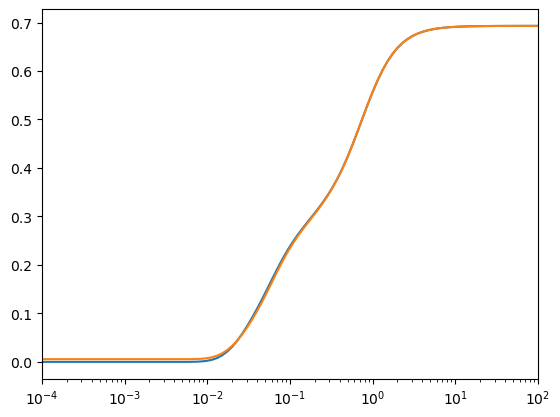

(0.00010000000000000005, 100)

In [17]:
semilogx(temp, S/N)
semilogx(temp, St/N)
xlim(10^-4, 10^2)